## POLA RAVI TEJA

### THE SPARKS FOUNDATION

### Data Science and Business Analytics  - Task 6

Prediction using Decision Tree Classifier.

The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

Dataset description: It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from sklearn import tree

## Loading and Preparing Data

In [2]:
iris_df = pd.read_csv("Iris.csv")

In [3]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
iris_df = iris_df.drop("Id", axis=1)

In [6]:
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


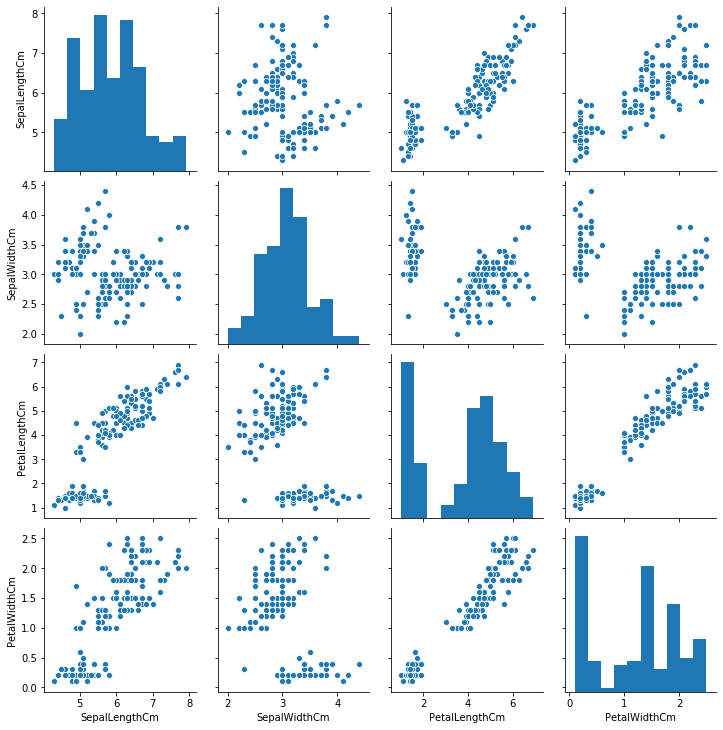

In [7]:
sns.pairplot(iris_df)

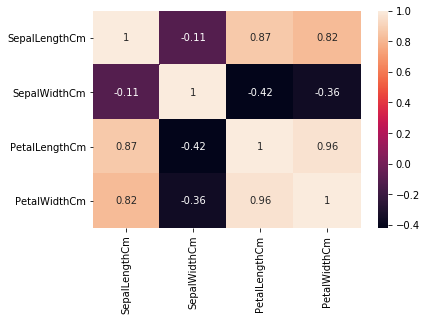

In [8]:
corr = iris_df.corr(method ='pearson')
sns.heatmap(corr, annot = True)

## Label Encoding

In [9]:
LE = LabelEncoder()

iris_df_LE = iris_df 
iris_df_LE.Species = LE.fit_transform(iris_df_LE.Species)

for col in iris_df_LE.columns:
    print(col,':',len(iris_df_LE[col].unique()),'labels')

SepalLengthCm : 35 labels
SepalWidthCm : 23 labels
PetalLengthCm : 43 labels
PetalWidthCm : 22 labels
Species : 3 labels


## Test and Train dataset Split

In [10]:
data = iris_df.values
X, y = data[:,:-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 

## Decision Tree Classifier

In [11]:
DTC = DecisionTreeClassifier()
DTC = DTC.fit(X_train,y_train)

## Predictions

In [12]:
predictions = DTC.score(X,y)
print(predictions)

0.9933333333333333


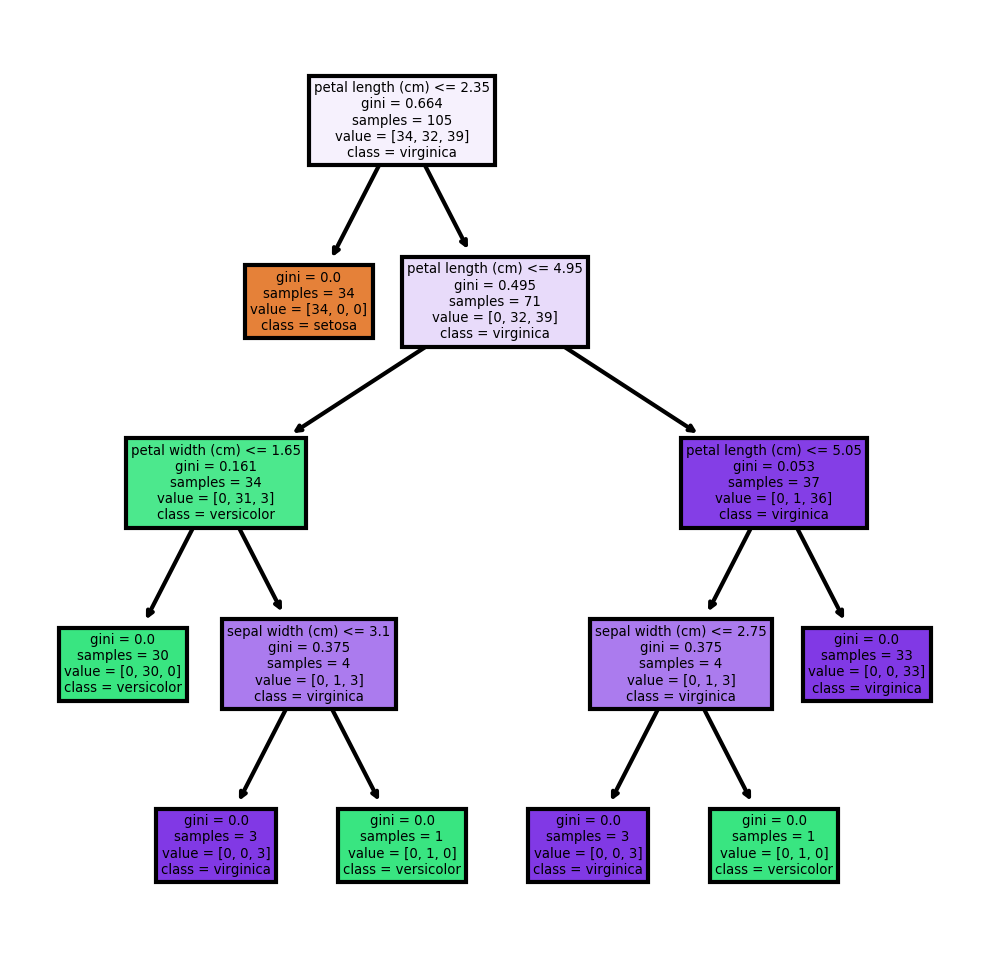

In [13]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(DTC,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')